In [59]:
import streamlit as st
import numpy as np
import pandas as pd
import yfinance as yf
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime
from nltk.sentiment.vader import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()


In [60]:
finviz_headlines = pd.read_csv('data/finviz_headlines.csv')

In [61]:
mean_scores = finviz_headlines.groupby(['ticker','date']).mean()

In [62]:
mean_scores

neg       neu       pos  compound
ticker date                                              
TSLA   2021-03-11  0.077500  0.868125  0.054375  0.014850
       2021-03-12  0.091038  0.840654  0.068308 -0.054527
       2021-03-13  0.024750  0.920000  0.055250  0.023187
       2021-03-14  0.072750  0.863583  0.063667 -0.034208
       2021-03-15  0.051091  0.919773  0.029114 -0.040036
       2021-03-18  0.062133  0.867333  0.070533  0.020473
       2021-03-19  0.081933  0.857033  0.061033 -0.040207
       2021-03-20  0.000000  0.930917  0.069083  0.137625
       2021-03-21  0.085500  0.796875  0.117750  0.082837
       2021-03-22  0.028469  0.900906  0.070625  0.051791

In [63]:
mean_scores = mean_scores.unstack()

In [64]:
mean_scores

neg                                                         \
date   2021-03-11 2021-03-12 2021-03-13 2021-03-14 2021-03-15 2021-03-18   
ticker                                                                     
TSLA       0.0775   0.091038    0.02475    0.07275   0.051091   0.062133   

                                                    ...   compound             \
date   2021-03-19 2021-03-20 2021-03-21 2021-03-22  ... 2021-03-11 2021-03-12   
ticker                                              ...                         
TSLA     0.081933        0.0     0.0855   0.028469  ...    0.01485  -0.054527   

                                                                          \
date   2021-03-13 2021-03-14 2021-03-15 2021-03-18 2021-03-19 2021-03-20   
ticker                                                                     
TSLA     0.023187  -0.034208  -0.040036   0.020473  -0.040207   0.137625   

                              
date   2021-03-21 2021-03-22  
ticker                        
TSLA     0.082837   0.051791  

[1 rows x 40 columns]

In [65]:
mean_scores = mean_scores.xs('compound', axis='columns').transpose()
mean_scores

ticker,TSLA
date,
2021-03-11,0.014850
2021-03-12,-0.054527
2021-03-13,0.023187
2021-03-14,-0.034208
2021-03-15,-0.040036
2021-03-18,0.020473
2021-03-19,-0.040207
2021-03-20,0.137625
2021-03-21,0.082837


In [66]:
mean_scores.dtypes

ticker
TSLA    float64
dtype: object

In [107]:
fig = px.bar(mean_scores, y='TSLA')
fig.show()

ValueError: Value of 'y' is not the name of a column in 'data_frame'. Expected one of [0] but received: TSLA

In [94]:
tweets = pd.read_csv('data/TSLA_tweets.csv')
tweets = tweets[['created_at', 'text']]
tweets

,created_at,text
0,2021-03-12T23:59:59.000Z,RT @elhackernet: Hackean más de 150.000 cámara...
1,2021-03-12T23:59:58.000Z,@28delayslater Tesla intimidates the polluters
2,2021-03-12T23:59:55.000Z,@elonmusk when @Tesla will start sell it cars ...
3,2021-03-12T23:59:54.000Z,@elonmusk DENT coin: TDEN Tesla Delivers Endle...
4,2021-03-12T23:59:52.000Z,@monster_tesla Sevdim bunu 😏
...,...,...
1189,2021-03-21T23:56:30.000Z,RT @SawyerMerritt: 10 years ago Apple's market...
1190,2021-03-21T23:56:29.000Z,@OneBasketOfEggs Ark has lots of cool ideas. N...
1191,2021-03-21T23:56:27.000Z,RT @SamAntar: Crazy Eddie Memoirs: Analysts wh...
1192,2021-03-21T23:56:26.000Z,RT @BahamaBen9: Let's see how big the $TSLA co...


In [95]:
tweets['created_at'] = pd.to_datetime(tweets.created_at, format='%Y-%m-%d').dt.date

In [96]:
tweets

,created_at,text
0,2021-03-12,RT @elhackernet: Hackean más de 150.000 cámara...
1,2021-03-12,@28delayslater Tesla intimidates the polluters
2,2021-03-12,@elonmusk when @Tesla will start sell it cars ...
3,2021-03-12,@elonmusk DENT coin: TDEN Tesla Delivers Endle...
4,2021-03-12,@monster_tesla Sevdim bunu 😏
...,...,...
1189,2021-03-21,RT @SawyerMerritt: 10 years ago Apple's market...
1190,2021-03-21,@OneBasketOfEggs Ark has lots of cool ideas. N...
1191,2021-03-21,RT @SamAntar: Crazy Eddie Memoirs: Analysts wh...
1192,2021-03-21,RT @BahamaBen9: Let's see how big the $TSLA co...


In [97]:
tweet_scores = pd.DataFrame(tweets['text'].apply(vader.polarity_scores).tolist())

In [98]:
tweets = tweets.join(tweet_scores, rsuffix='_right')

In [99]:
tweets

,created_at,text,neg,neu,pos,compound
0,2021-03-12,RT @elhackernet: Hackean más de 150.000 cámara...,0.000,1.000,0.000,0.0000
1,2021-03-12,@28delayslater Tesla intimidates the polluters,0.639,0.361,0.000,-0.6486
2,2021-03-12,@elonmusk when @Tesla will start sell it cars ...,0.000,1.000,0.000,0.0000
3,2021-03-12,@elonmusk DENT coin: TDEN Tesla Delivers Endle...,0.000,1.000,0.000,0.0000
4,2021-03-12,@monster_tesla Sevdim bunu 😏,0.000,1.000,0.000,0.0000
...,...,...,...,...,...,...
1189,2021-03-21,RT @SawyerMerritt: 10 years ago Apple's market...,0.094,0.906,0.000,-0.3400
1190,2021-03-21,@OneBasketOfEggs Ark has lots of cool ideas. N...,0.121,0.818,0.061,-0.3818
1191,2021-03-21,RT @SamAntar: Crazy Eddie Memoirs: Analysts wh...,0.237,0.763,0.000,-0.7351
1192,2021-03-21,RT @BahamaBen9: Let's see how big the $TSLA co...,0.000,1.000,0.000,0.0000


In [100]:
mean_scores = tweets.groupby(['created_at']).mean()

mean_scores = mean_scores.unstack()

In [101]:
mean_scores

          created_at
neg       2021-03-12    0.044670
          2021-03-13    0.030010
          2021-03-14    0.028820
          2021-03-15    0.021750
          2021-03-16    0.031060
          2021-03-17    0.052606
          2021-03-18    0.030850
          2021-03-19    0.049180
          2021-03-20    0.042480
          2021-03-21    0.051828
neu       2021-03-12    0.893280
          2021-03-13    0.883939
          2021-03-14    0.880620
          2021-03-15    0.881980
          2021-03-16    0.858935
          2021-03-17    0.849061
          2021-03-18    0.863780
          2021-03-19    0.888150
          2021-03-20    0.872420
          2021-03-21    0.868475
pos       2021-03-12    0.062080
          2021-03-13    0.086061
          2021-03-14    0.090530
          2021-03-15    0.096260
          2021-03-16    0.110025
          2021-03-17    0.098323
          2021-03-18    0.105340
          2021-03-19    0.062710
          2021-03-20    0.085090
          2021-03-21  

In [102]:
mean_scores = mean_scores.xs('compound').transpose()

In [103]:
mean_scores

created_at
2021-03-12    0.050135
2021-03-13    0.156900
2021-03-14    0.136133
2021-03-15    0.209504
2021-03-16    0.182486
2021-03-17    0.112693
2021-03-18    0.220476
2021-03-19    0.045739
2021-03-20    0.077321
2021-03-21    0.065026
dtype: float64

In [105]:
mean_scores

AttributeError: 'Series' object has no attribute 'columns'

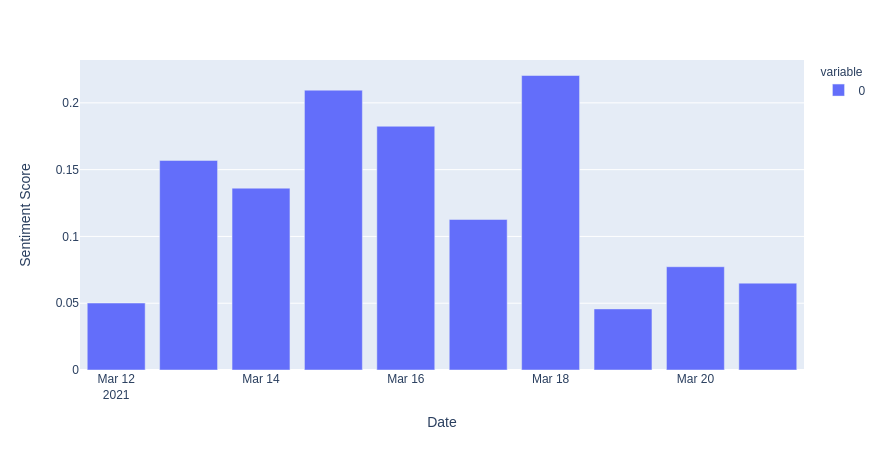

In [110]:
fig = px.bar(mean_scores, labels={"created_at":"Date", "value":"Sentiment Score"})
fig.show()